# 1. 데이터 분석 패키지 불러오기

In [30]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## 나무구조 생성 및 저장
from sklearn.tree import export_graphviz
##그래프 비즈 나무구조 시각화
import graphviz

##데이터 분할
from sklearn.model_selection import train_test_split

#예측 회귀
from sklearn.tree import DecisionTreeRegressor

##최적 모델 파라미터 탐색
from sklearn.model_selection import GridSearchCV

import os
import pydot
from IPython.display import Image, display

In [29]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [ ]:
## 나무 시각화 환경 설정 
import os
import os.environ['PATH']+=os.pathsep+""

# 2. 데이터 불러오기

In [9]:
df_raw=pd.read_csv("./체질검사.csv", encoding='euc-kr')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER
0,35.2,46,363.15 lb,72.25 inch,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성
1,11.8,27,168 lb,71.25 inch,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성
2,22.2,69,177.75 lb,68.5 inch,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성
3,10.6,57,147.75 lb,65.75 inch,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성
4,47.5,51,219 lb,64 inch,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성


In [10]:
## 데이터 구성 변환하기 
## 단위와 같이 표현되어 있는 수치형 변수 처리 

df_raw[['WEIGHT','WEIGHT_UNIT']]=df_raw['WEIGHT'].str.split(expand=True)
df_raw[['HEIGHT','HEIGHT_UNIT']]=df_raw['HEIGHT'].str.split(expand=True)

df_raw['WEIGHT']=df_raw['WEIGHT'].astype('float64')
df_raw['HEIGHT']=df_raw['HEIGHT'].astype('float64')
df_raw.info()


#단위를 나타내는 항목 제외 
df_raw=df_raw.drop(['WEIGHT_UNIT','HEIGHT_UNIT'],axis=1)

#범주형 변수의 dummy변수화 
df_raw_dummy=pd.get_dummies(df_raw,drop_first=True)
df_raw_dummy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FAT          252 non-null    float64
 1   AGE          252 non-null    int64  
 2   WEIGHT       252 non-null    float64
 3   HEIGHT       252 non-null    float64
 4   NECK         252 non-null    float64
 5   CHEST        252 non-null    float64
 6   ABDOMEN      252 non-null    float64
 7   HIP          252 non-null    float64
 8   THIGH        252 non-null    float64
 9   KNEE         252 non-null    float64
 10  ANKLE        252 non-null    float64
 11  BICEPS       252 non-null    float64
 12  FOREARM      252 non-null    float64
 13  WRIST        252 non-null    float64
 14  GENDER       252 non-null    object 
 15  WEIGHT_UNIT  252 non-null    object 
 16  HEIGHT_UNIT  252 non-null    object 
dtypes: float64(13), int64(1), object(3)
memory usage: 33.6+ KB


,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER_여성
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,0
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,0
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,0
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,1
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,1


# 3. 데이터 구성하기 


In [11]:
## 변수 역활 지정 
df_raw_y=df_raw_dummy['FAT']
df_raw_x=df_raw_dummy.drop('FAT', axis=1, inplace=False)

In [12]:
## 데이터 분할하기 
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y, test_size=0.3,random_state=1234)
print(f"train_data_size{df_train_x.shape}")
print(f"train_data_size{df_test_x.shape}")
print(f"train_data_size{df_train_y.shape}")
print(f"train_data_size{df_test_y.shape}")


train_data_size(176, 14)
train_data_size(76, 14)
train_data_size(176,)
train_data_size(76,)


# 4. 모델 생성 및 파라미터 조정

In [13]:
## 기본 옵션으로 모델 생성하기 
tree_uncostomized=DecisionTreeRegressor(random_state=1234)
tree_uncostomized.fit(df_train_x,df_train_y)

#train 데이터의 설명력
print(f"score on trainnig set{tree_uncostomized.score(df_train_x,df_train_y)}")

##test 데이터의 설명력
print(f"score on test set{tree_uncostomized.score(df_test_x,df_test_y)}")

score on trainnig set1.0
score on test set0.4040681074053072


In [14]:
## 현재 생성된 트리모델의 옵션확인

tree_uncostomized.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1234,
 'splitter': 'best'}

In [25]:
## 파라미터 조정 

#train 데이터 와 test데이터의 설명력을 저장하기
train_score=[]
test_score=[]

#min_samoles_leaf: 잎사귀 최소 자료수
para_leaf=[n_leaf for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeRegressor(random_state=1234,
                              min_samples_leaf=v_min_samples_leaf)
    
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
    
#결과 저장
df_score_leaf=pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score

In [26]:
#모델 설명력 확인
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.404
1,2,0.970,0.362
2,3,0.928,0.452
3,4,0.904,0.454
4,5,0.869,0.449
5,6,0.853,0.451
6,7,0.843,0.465
7,8,0.830,0.536
8,9,0.802,0.477
9,10,0.793,0.505


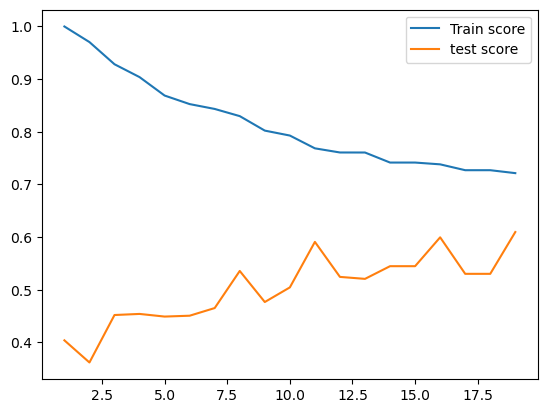

In [27]:
##모델 설명력을 그래프로 확인해보기
plt.plot(para_leaf,train_score,linestyle="-",label="Train score")
plt.plot(para_leaf,test_score,linestyle="-",label="test score")

plt.legend()

# 5. 나무 구조 시각화 

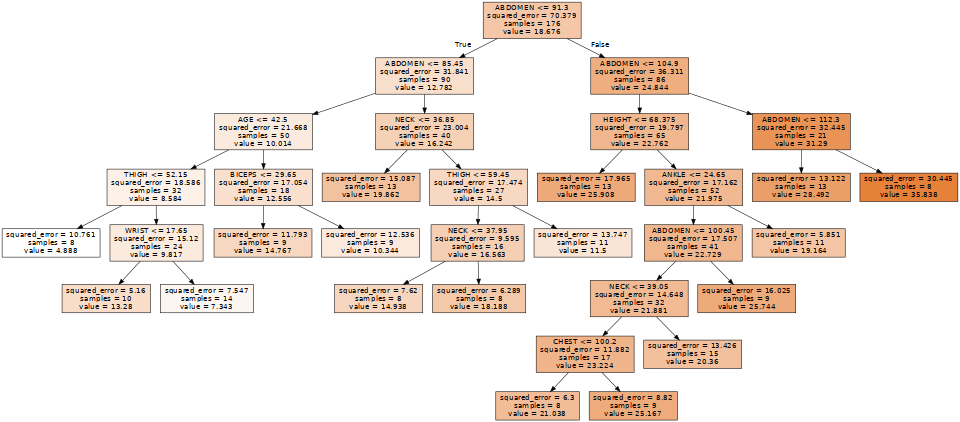

In [32]:
# 변수명 저장
v_feature_name=df_train_x.columns

#노드의 최소자료수=8 모델
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=8)
tree_graph.fit(df_train_x,df_train_y)

export_graphviz(tree_graph,out_file="tree_leaf.dot",feature_names=v_feature_name,impurity=True,filled=True)

with open("tree_leaf.dot")as f:
    dot_graph=f.read()

#display(graphviz.Source(dot_graph))

(graph,)=pydot.graph_from_dot_file("tree_leaf.dot")
graph.set_size("10,10!") #크기조정 (예:8,8)

# 이미지로 출력
png_image=graph.create_png()
display(Image(png_image))

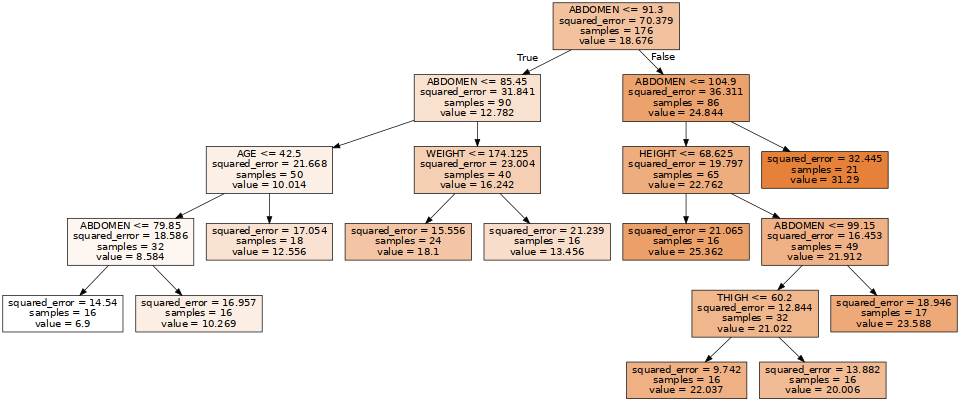

In [33]:
# 변수명 저장
v_feature_name=df_train_x.columns

#노드의 최소자료수=16 모델
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=16)
tree_graph.fit(df_train_x,df_train_y)

export_graphviz(tree_graph,out_file="tree_leaf.dot",feature_names=v_feature_name,impurity=True,filled=True)

with open("tree_leaf.dot")as f:
    dot_graph=f.read()

#display(graphviz.Source(dot_graph))

(graph,)=pydot.graph_from_dot_file("tree_leaf.dot")
graph.set_size("10,10!") #크기조정 (예:8,8)

# 이미지로 출력
png_image=graph.create_png()
display(Image(png_image))

In [37]:
# min_sample_split: 분리 노드의 최소 자료수 변경에 따른 모델 성능

## 파라미터 조정 

#train 데이터 와 test데이터의 설명력을 저장하기
train_score=[]
test_score=[]

#min_samples_leaf: 잎사귀 최소 자료수
para_split=[n_leaf for n_leaf in range(2,20)]

for v_min_samples_split in para_split:
    tree=DecisionTreeRegressor(random_state=1234,
                              min_samples_leaf=8,
                               min_samples_split=v_min_samples_split)
    
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
    
#결과 저장
df_score_leaf=pd.DataFrame()
df_score_leaf['MinSampsplit']=para_split
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score

In [38]:
#모델 설명력 확인
df_score_leaf.round(3)

,MinSampsplit,TrainScore,TestScore
0,2,0.830,0.536
1,3,0.830,0.536
2,4,0.830,0.536
3,5,0.830,0.536
4,6,0.830,0.536
5,7,0.830,0.536
6,8,0.830,0.536
7,9,0.830,0.536
8,10,0.830,0.536
9,11,0.830,0.536


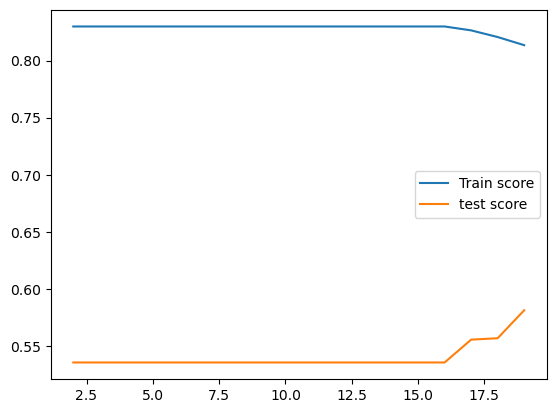

In [39]:
##모델 설명력을 그래프로 확인해보기
plt.plot(para_split,train_score,linestyle="-",label="Train score")
plt.plot(para_split,test_score,linestyle="-",label="test score")

plt.legend()

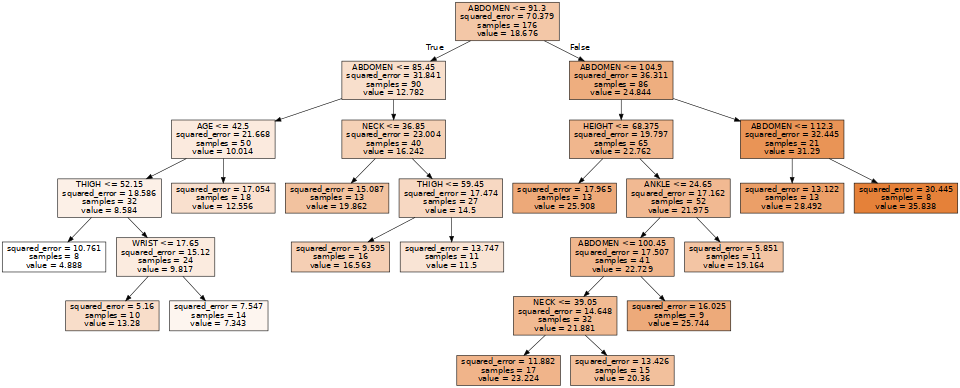

In [40]:
# 분리노드의 최소 자료수 변경결과 비교 20,26

# 변수명 저장
v_feature_name=df_train_x.columns

#노드의 최소자료수=8 모델
##분리노드의 최소 자료수 20모델
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=8,min_samples_split=20)
tree_graph.fit(df_train_x,df_train_y)

export_graphviz(tree_graph,out_file="tree_leaf.dot",feature_names=v_feature_name,impurity=True,filled=True)

with open("tree_leaf.dot")as f:
    dot_graph=f.read()

#display(graphviz.Source(dot_graph))

(graph,)=pydot.graph_from_dot_file("tree_leaf.dot")
graph.set_size("10,10!") #크기조정 (예:8,8)

# 이미지로 출력
png_image=graph.create_png()
display(Image(png_image))

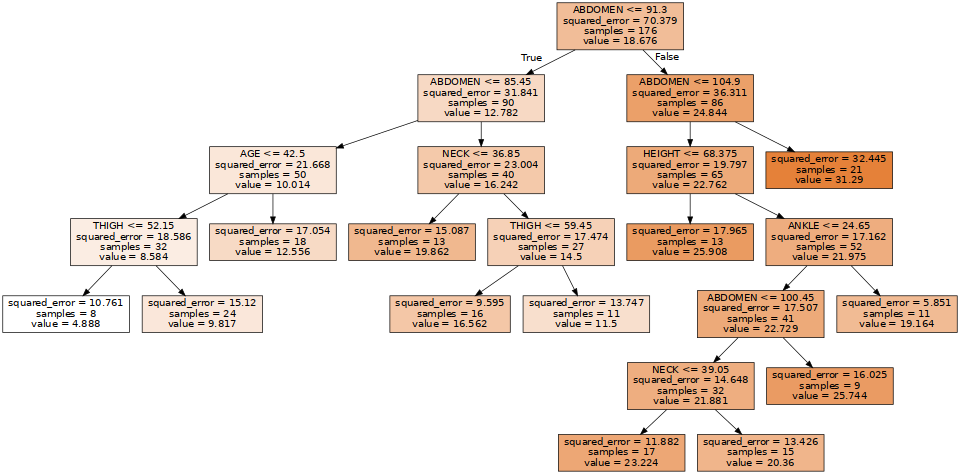

In [41]:
# 분리노드의 최소 자료수 변경결과 비교 20,26

# 변수명 저장
v_feature_name=df_train_x.columns

#노드의 최소자료수=8 모델
##분리노드의 최소 자료수 26모델
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=8,min_samples_split=26)
tree_graph.fit(df_train_x,df_train_y)

export_graphviz(tree_graph,out_file="tree_leaf.dot",feature_names=v_feature_name,impurity=True,filled=True)

with open("tree_leaf.dot")as f:
    dot_graph=f.read()

#display(graphviz.Source(dot_graph))

(graph,)=pydot.graph_from_dot_file("tree_leaf.dot")
graph.set_size("10,10!") #크기조정 (예:8,8)

# 이미지로 출력
png_image=graph.create_png()
display(Image(png_image))

In [44]:
# max_depth: 최대 깊이 변경에 따른 모델 성능

## 파라미터 조정 

#train 데이터 와 test데이터의 설명력을 저장하기
train_score=[]
test_score=[]

#min_samples_leaf: 잎사귀 최소 자료수
para_depth=[depth for depth in range(1,12)]

for v_max_depth in para_depth:
    tree=DecisionTreeRegressor(random_state=1234,
                              min_samples_leaf=8,
                               min_samples_split=20,
                              max_depth=v_max_depth)
    
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
    
    
#결과 저장
df_score_leaf=pd.DataFrame()
df_score_leaf['Depth']=para_depth
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score

In [45]:
#모델 설명력 확인
df_score_leaf.round(3)

,Depth,TrainScore,TestScore
0,1,0.517,0.333
1,2,0.679,0.569
2,3,0.749,0.538
3,4,0.783,0.570
4,5,0.808,0.581
5,6,0.813,0.581
6,7,0.813,0.581
7,8,0.813,0.581
8,9,0.813,0.581
9,10,0.813,0.581


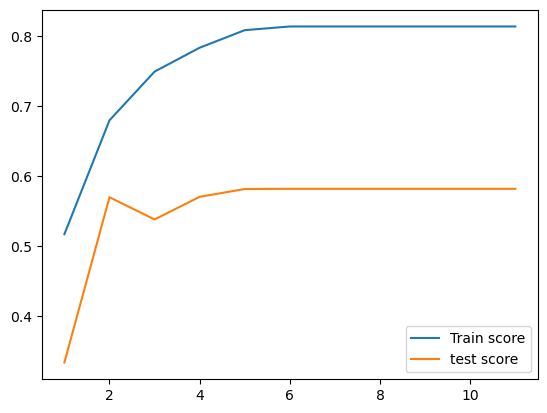

In [47]:
##모델 설명력을 그래프로 확인해보기
plt.plot(para_depth,train_score,linestyle="-",label="Train score")
plt.plot(para_depth,test_score,linestyle="-",label="test score")

plt.legend()

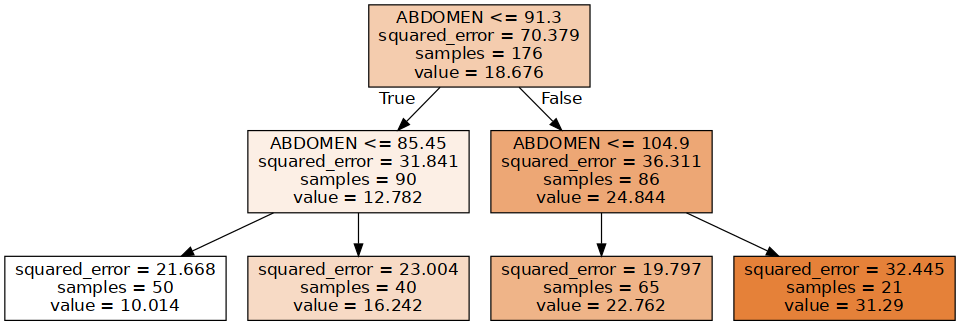

In [48]:
# 모델 파라미터 조정
# 분리노드의 최소 자료수 변경결과 비교 20,26

# 변수명 저장
v_feature_name=df_train_x.columns

#노드의 최소자료수=8 모델
##분리노드의 최소 자료수 20모델
## max_depth=2
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=8,min_samples_split=20,max_depth=2)
tree_graph.fit(df_train_x,df_train_y)

export_graphviz(tree_graph,out_file="tree_leaf.dot",feature_names=v_feature_name,impurity=True,filled=True)

with open("tree_leaf.dot")as f:
    dot_graph=f.read()

#display(graphviz.Source(dot_graph))

(graph,)=pydot.graph_from_dot_file("tree_leaf.dot")
graph.set_size("10,10!") #크기조정 (예:8,8)

# 이미지로 출력
png_image=graph.create_png()
display(Image(png_image))

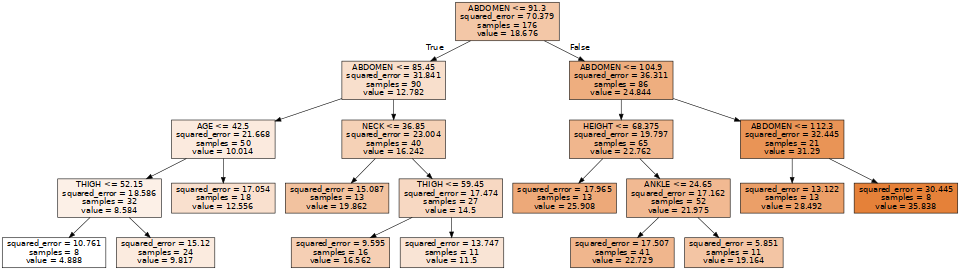

In [49]:
# 모델 파라미터 조정
# 분리노드의 최소 자료수 변경결과 비교 20,26

# 변수명 저장
v_feature_name=df_train_x.columns

#노드의 최소자료수=8 모델
##분리노드의 최소 자료수 20모델
## max_depth=4
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=8,min_samples_split=20,max_depth=4)
tree_graph.fit(df_train_x,df_train_y)

export_graphviz(tree_graph,out_file="tree_leaf.dot",feature_names=v_feature_name,impurity=True,filled=True)

with open("tree_leaf.dot")as f:
    dot_graph=f.read()

#display(graphviz.Source(dot_graph))

(graph,)=pydot.graph_from_dot_file("tree_leaf.dot")
graph.set_size("10,10!") #크기조정 (예:8,8)

# 이미지로 출력
png_image=graph.create_png()
display(Image(png_image))

# 5. 최종 모델 선정

In [50]:
v_feature_name=df_train_x.columns
tree_final=DecisionTreeRegressor(random_state=1234,min_samples_leaf=8,min_samples_split=20,max_depth=4)
tree_final.fit(df_train_x,df_train_y)
tree_final.get_params()

#평가용 데이터에 대한 실제값과 예측값확인(10개)
test_pred=tree_final.predict(df_test_x)
print(f"test_data에 대한 실제값 \n {df_test_y[:10]}")
print(f"test_data에 대한 실제값 \n {test_pred[:10]}")

test_data에 대한 실제값 
 208     8.0
94      9.6
31     34.3
248    23.6
216    31.4
6      23.3
91      5.2
73     12.5
129    13.9
5      24.2
Name: FAT, dtype: float64
test_data에 대한 실제값 
 [12.55555556 22.72926829 35.8375     16.5625     25.90769231 16.5625
 12.55555556  4.8875     16.5625     22.72926829]


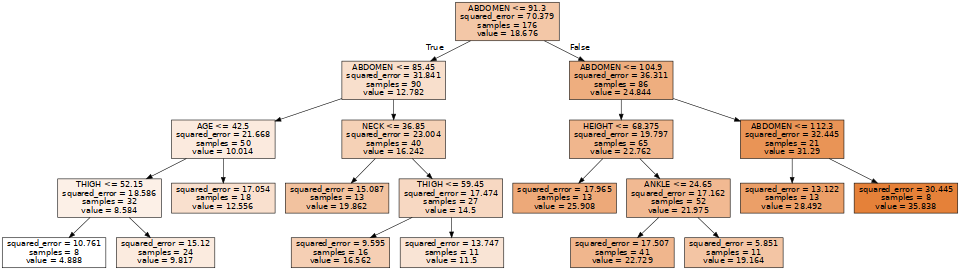

In [51]:
# 모델 시각화 

export_graphviz(tree_final,out_file="tree_final.dot",feature_names=v_feature_name,impurity=True,filled=True)

with open("tree_final.dot")as f:
    dot_graph=f.read()

#display(graphviz.Source(dot_graph))

(graph,)=pydot.graph_from_dot_file("tree_final.dot")
graph.set_size("10,10!") #크기조정 (예:8,8)

# 이미지로 출력
png_image=graph.create_png()
display(Image(png_image))

In [53]:
# 결론 도출

## 설명변수의 중요도: feature_importance

df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance']=tree_final.feature_importances_

#데이터 프레임 정렬
df_importance.sort_values("Importance",ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.895
7,THIGH,0.032
3,NECK,0.026
0,AGE,0.019
2,HEIGHT,0.017
9,ANKLE,0.011
1,WEIGHT,0.000
4,CHEST,0.000
6,HIP,0.000
8,KNEE,0.000


Text(0, 0.5, '변수')

/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/home/piai/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50668 (\N

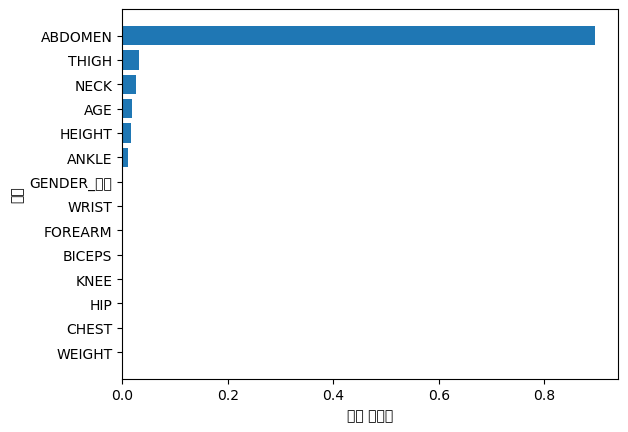

In [54]:
## 설명변수 중요도 그래프 
# 중요한 변수를 상위에 그림

df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 6. GridSearchCv를 이용한 parameta 찾기

In [56]:
estimator=DecisionTreeRegressor()

#구하고자 하는 파라미터와 범위 
param_grid={"criterion":["mse","friedman_mse","mae"],
           "max_features":["auto","sqrt","log2"],
           "min_samples_leaf":para_leaf}

#설명력이 높은 최적 parameter 찾기
grid_dt=GridSearchCV(estimator,param_grid,scoring="r2",n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)


print(f"best estimator model {grid_dt.best_estimator_}")
print(f"best parametor \n {grid_dt.best_params_}")
print(f"best score \n {grid_dt.best_score_.round(3)}")

/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  war

best estimator model DecisionTreeRegressor(criterion='friedman_mse', max_features='auto',
                      min_samples_leaf=17)
best parametor 
 {'criterion': 'friedman_mse', 'max_features': 'auto', 'min_samples_leaf': 17}
best score 
 0.591


/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
570 fits failed out of a total of 855.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
82 fits failed with the following error:
Traceback (most recent call last):
  File "/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/home/piai/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/home/piai/anaconda3/lib/python3.10/